<a href="https://colab.research.google.com/github/x1001000/TensorFlow-Hub-Object-Detection/blob/main/TensorFlow_Hub_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 👆Change runtime type to GPU

---
# Env

In [1]:
!git clone https://github.com/tensorflow/models
!git clone https://github.com/aalpatya/detect_hands
!git clone https://github.com/x1001000/TensorFlow-Hub-Object-Detection

Cloning into 'models'...
remote: Enumerating objects: 57592, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 57592 (delta 5), reused 4 (delta 1), pack-reused 57578
Receiving objects: 100% (57592/57592), 572.72 MiB | 37.90 MiB/s, done.
Resolving deltas: 100% (39945/39945), done.
Cloning into 'detect_hands'...
remote: Enumerating objects: 206, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 206 (delta 38), reused 56 (delta 20), pack-reused 118
Receiving objects: 100% (206/206), 53.76 MiB | 29.77 MiB/s, done.
Resolving deltas: 100% (81/81), done.
Cloning into 'TensorFlow-Hub-Object-Detection'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 62 (delta 4), reused 62 (delta 4), pack-reused 0
Unpacking objects: 100% (62/62), done.


In [2]:
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py . 
!python -m pip install .

/content/models/research
Processing /content/models/research
     |████████████████████████████████| 9.6MB 32.7MB/s 
     |████████████████████████████████| 358kB 52.0MB/s 
     |████████████████████████████████| 1.6MB 51.1MB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
     |████████████████████████████████| 2.3MB 45.1MB/s 
     |████████████████████████████████| 829kB 52.2MB/s 
     |████████████████████████████████| 153kB 55.8MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
     |████████████████████████████████| 38.2MB 78kB/s 
     |████████████████████████████████| 102kB 14.7MB/s 
     |████████████████████████████████| 174kB 57.9MB/s 
     |████████████████████████████████| 61kB 10.0MB/s 
     |████████████████████████████████| 1.2MB 43.2MB/s 
     |████████████████████████████████| 645kB 45.8MB/s 
     |████████████████████████████████| 686kB 35.0MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1650082 sha25

In [3]:
#TEST IF YOU WANT
!python object_detection/builders/model_builder_tf2_test.py

2021-05-31 23:11:59.809497: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-05-31 23:12:01.863572: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-05-31 23:12:01.928338: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-31 23:12:01.928961: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-31 23:12:01.929004: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfull

---
# Data

In [4]:
%cd /content/TensorFlow-Hub-Object-Detection
!cp /content/detect_hands/generate_tfrecord.py .

/content/TensorFlow-Hub-Object-Detection


In [5]:
# 註解掉 generate_tfrecord.py 第84行，先避開錯誤看看
!sed -i '84 s/^/#/' generate_tfrecord.py

In [6]:
# For the train dataset
!python generate_tfrecord.py --csv_input=images/train/train_labels.csv  --output_path=train.record
# For the test dataset
!python generate_tfrecord.py --csv_input=images/test/test_labels.csv  --output_path=test.record

2021-05-31 23:12:36.495167: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Successfully created the TFRecords: /content/TensorFlow-Hub-Object-Detection/train.record
2021-05-31 23:12:38.697307: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Successfully created the TFRecords: /content/TensorFlow-Hub-Object-Detection/test.record


---
# Model
- https://tfhub.dev/tensorflow/collections/object_detection
- https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_320x320

In [7]:
%cd /content
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
!tar -xzvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

/content
--2021-05-31 23:13:02--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.65.80, 2607:f8b0:4004:832::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.65.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.1s    

2021-05-31 23:13:03 (203 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coc

In [8]:
# Rename the unzipped folder
!mv ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8 ssd_mobilenet_v2_fpnlite_320x320

In [9]:
# Override the config
!cp /content/TensorFlow-Hub-Object-Detection/pipeline.config ssd_mobilenet_v2_fpnlite_320x320/

In [10]:
# Training the model for 20 minutes and manually stop it
%cd /content/models/research/object_detection/
!python model_main_tf2.py \
--pipeline_config_path=/content/ssd_mobilenet_v2_fpnlite_320x320/pipeline.config \
--model_dir=/content/TensorFlow-Hub-Object-Detection/output_training --alsologtostderr

/content/models/research/object_detection
2021-05-31 23:13:30.341643: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-05-31 23:13:32.224042: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-05-31 23:13:32.257577: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-31 23:13:32.258165: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-31 23:13:32.258211: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-05-31 23:13:32.260890: I t

In [11]:
# Exporting the model
%cd /content/models/research/object_detection/
!python exporter_main_v2.py \
--pipeline_config_path=/content/ssd_mobilenet_v2_fpnlite_320x320/pipeline.config \
--trained_checkpoint_dir=/content/TensorFlow-Hub-Object-Detection/output_training \
--output_directory=/content/TensorFlow-Hub-Object-Detection/inference

/content/models/research/object_detection
2021-05-31 23:33:35.874661: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-05-31 23:33:37.493898: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-05-31 23:33:37.526052: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-31 23:33:37.526631: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-31 23:33:37.526672: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-05-31 23:33:37.532458: I t

---
# Inference

In [36]:
%cd /content
import cv2
import numpy as np
import pandas as pd
import tensorflow_hub as hub
from object_detection.utils import visualization_utils as viz_utils
from google.colab.patches import cv2_imshow
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
# from object_detection.utils import label_map_util
# PATH_TO_LABELS = './models/research/object_detection/data/mscoco_label_map.pbtxt'
# category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)
category_index = {1: {'id': 1, 'name': 'solar_panel'}}
label_id_offset = 0

def inference():
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections[0],
        result['detection_boxes'][0],
        (np.array(result['detection_classes'])[0] + label_id_offset).astype(int), # tenor轉ndarray
        result['detection_scores'][0],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=1,
        min_score_thresh=.01,
        agnostic_mode=False,)
        # keypoints=keypoints,
        # keypoint_scores=keypoint_scores,
        # keypoint_edges=COCO17_HUMAN_POSE_KEYPOINTS)

/content


In [13]:
# Load a saved model
model = hub.load('/content/TensorFlow-Hub-Object-Detection/inference/saved_model')

/content/TensorFlow-Hub-Object-Detection

images/test/00000004.jpg


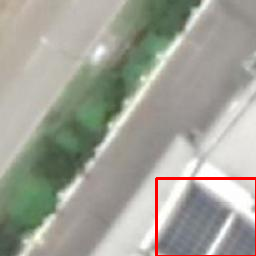

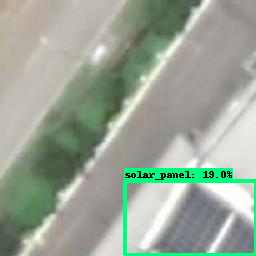


images/test/00000005.jpg


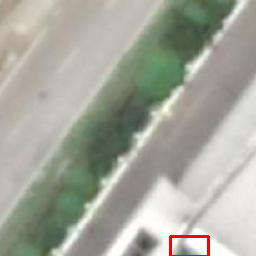

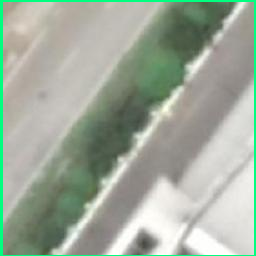


images/test/00000006.jpg


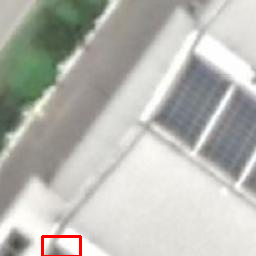

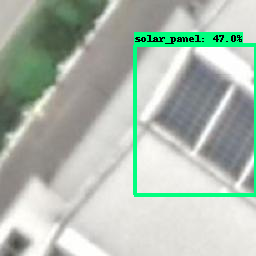


images/test/00000007.jpg


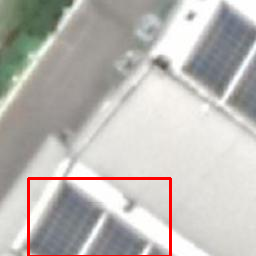

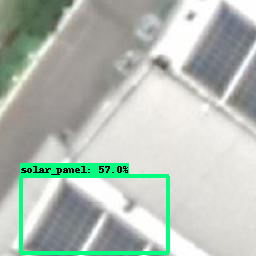


images/test/00000010.jpg


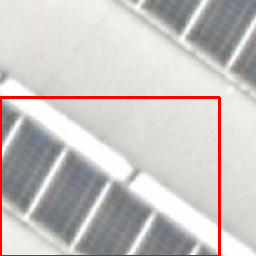

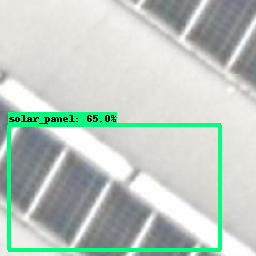


images/test/00000011.jpg


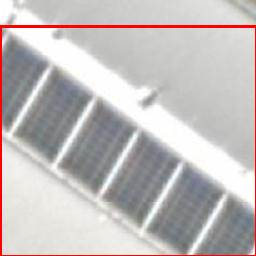

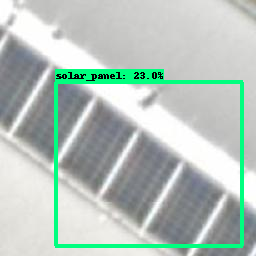


images/test/00000012.jpg


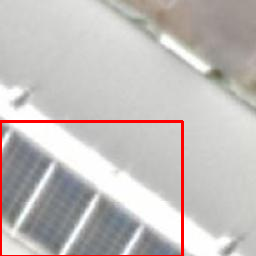

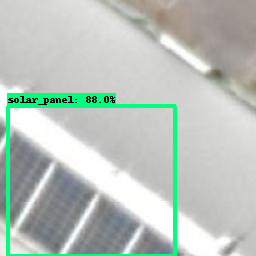


images/test/00000013.jpg


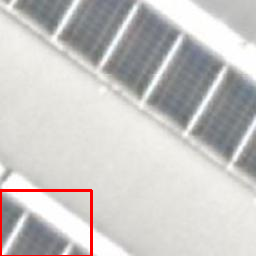

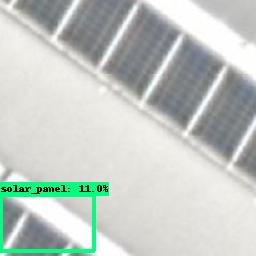


images/test/00000014.jpg


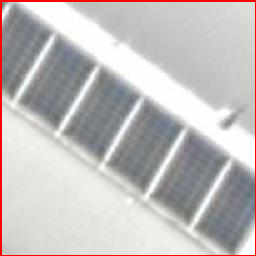

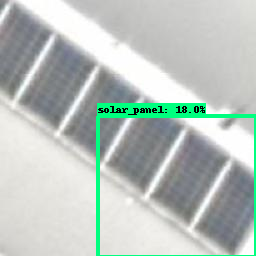


images/test/00000028.jpg


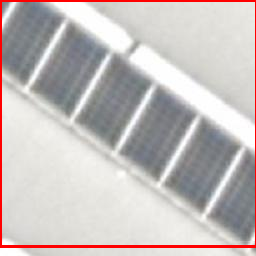

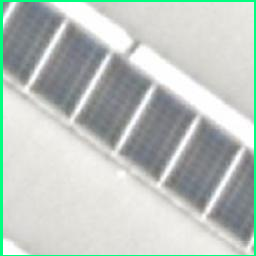


images/test/00000029.jpg


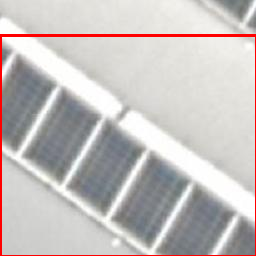

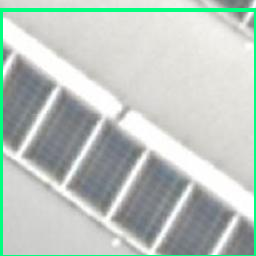


images/test/00000038.jpg


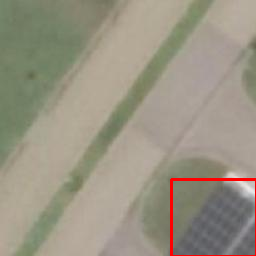

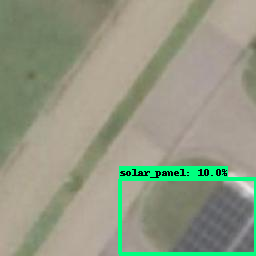


images/test/00000039.jpg


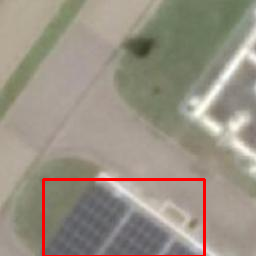

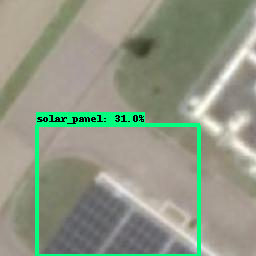


images/test/00000048.jpg


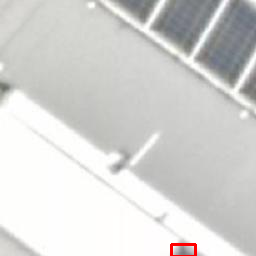

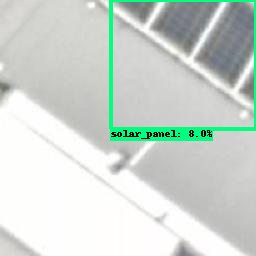


images/test/00000049.jpg


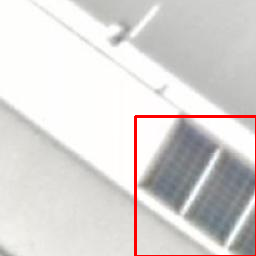

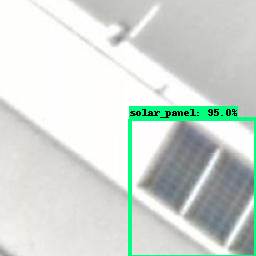

In [51]:
# Load test images and compare with their inference
%cd /content/TensorFlow-Hub-Object-Detection
test_data = pd.read_csv('/content/TensorFlow-Hub-Object-Detection/images/test/test_labels.csv')

for i in range(len(test_data)):
    print(f'\n{test_data.iloc[i,0]}')
    image = cv2.imread(test_data.iloc[i,0])
    image_np = image.reshape(-1,256,256,3)
    image_np_with_detections = image_np.copy()
    xmin = round(test_data.iloc[i,4])
    ymin = round(test_data.iloc[i,5])
    xmax = round(test_data.iloc[i,6])
    ymax = round(test_data.iloc[i,7])
    cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (0,0,255), 2)
    cv2_imshow(image)
    result = model(image_np)
    inference()
    cv2_imshow(image_np_with_detections[0])